In [31]:
pip install langchain langgraph langchain_groq pydantic

Create State class

In [32]:
from pydantic import BaseModel
from typing import List
from typing_extensions import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class state(BaseModel):
  messages:Annotated[List[AnyMessage],add_messages]

Create LLM

In [33]:
from langchain_groq import ChatGroq
from google.colab import userdata
groq_key = userdata.get('groq_key')

llm = ChatGroq(api_key=groq_key, model="meta-llama/llama-4-scout-17b-16e-instruct",)

Create LLM Function

In [34]:
def llm_function(state):
  """
      This function is called to invoke the LLM
  """
  response = llm(state.messages)
  state.messages.append(response)
  return state

Create Memory object

In [35]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
config = {"configurable":{"thread_id":"1"}}

Creeate Graph Node and edges

In [36]:
from langgraph.graph import StateGraph, START, END

In [37]:
graph = StateGraph(state)
graph.add_node("llm", llm_function)
graph.add_edge(START, "llm")
graph.add_edge("llm", END)
builder = graph.compile(memory)

Verify the Graph

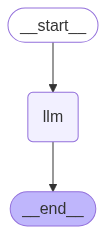

In [38]:
from IPython.display import display, Image
display(Image(builder.get_graph().draw_mermaid_png()))

Stream LLM


*   Value : The whole stream will be returned
*   Update : only the recent update will be returned



In [39]:
for chunk in builder.stream({"messages":"Hi I am kani working as a software developer"},config=config,stream_mode="values"):
  print(chunk)

{'messages': [HumanMessage(content='Hi I am kani working as a software developer', additional_kwargs={}, response_metadata={}, id='491985e4-3a6c-4ed7-ae8c-39c593f420ad')]}


/tmp/ipython-input-34-4104806693.py:5: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm(state.messages)


{'messages': [HumanMessage(content='Hi I am kani working as a software developer', additional_kwargs={}, response_metadata={}, id='491985e4-3a6c-4ed7-ae8c-39c593f420ad'), AIMessage(content="Nice to meet you, Kani! I'm glad to hear you're working as a software developer. What kind of projects are you currently working on? Are you using any specific programming languages or technologies? I'm here to chat and help if you need any assistance or just want to discuss something related to software development!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 20, 'total_tokens': 82, 'completion_time': 0.122912103, 'prompt_time': 0.002395711, 'queue_time': 0.194013943, 'total_time': 0.125307814}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_37da608fc1', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--99d1855c-4852-43f8-b022-341d57202ef3-0', usage_metadata={'input_tokens'

In [40]:
for chunk in builder.stream({"messages":"i am learning AI"},config=config,stream_mode="updates"):
  print(chunk['messages'])

{'llm': {'messages': [HumanMessage(content='Hi I am kani working as a software developer', additional_kwargs={}, response_metadata={}, id='491985e4-3a6c-4ed7-ae8c-39c593f420ad'), AIMessage(content="Nice to meet you, Kani! I'm glad to hear you're working as a software developer. What kind of projects are you currently working on? Are you using any specific programming languages or technologies? I'm here to chat and help if you need any assistance or just want to discuss something related to software development!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 20, 'total_tokens': 82, 'completion_time': 0.122912103, 'prompt_time': 0.002395711, 'queue_time': 0.194013943, 'total_time': 0.125307814}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_37da608fc1', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--99d1855c-4852-43f8-b022-341d57202ef3-0', usage_metadata={'input